In [2]:
import cv2
import os
import random
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

In [3]:
DATASET_PATH = r'./images/'
TARGET_WIDTH = 320
TARGET_HEIGHT = 80
PADDING = 5

PYTESSERACT_CONFIG = '--psm 10 -c tessedit_char_whitelist=0123456789'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [4]:
def preprocess_image(image):
    original_image = cv2.resize(image, (TARGET_WIDTH, TARGET_HEIGHT))
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    _, th3 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    image = cv2.bitwise_not(th3)

    
    image = cv2.dilate(image, np.ones((1, 1), np.uint8), iterations=1)
    
    return image, original_image

In [5]:
def validate_character(character):
    character = character.strip()
    return character == '' or character == ' ' or character == None or len(character) > 1

In [6]:
def show_images(image_data):
    num_images = len(image_data)
    num_cols = 3 
    num_rows = int(np.ceil(num_images / num_cols)) * 2

    plt.figure(figsize=(15, 5 * (num_rows // 2))) 

    for i, (image, result_image) in enumerate(image_data):
        row_position = i // num_cols  
        col_position = i % num_cols 

        plt.subplot(num_rows, num_cols, row_position * num_cols * 2 + col_position + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')  # Hide the axes

        plt.subplot(num_rows, num_cols, (row_position * num_cols * 2 + col_position + 1) + num_cols)
        plt.imshow(result_image, cmap='gray')
        plt.axis('off') 

    plt.tight_layout() 
    plt.show()

In [48]:
def segment_image(image, original_image=None, image_name='', type='write'):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)

        if hierarchy[0][idx][3] == -1:
            
            if w < 30 and h < 30:
                continue
            
            start_x = np.max([0, x - PADDING])
            start_y = np.max([0, y - PADDING])
            
            end_x = np.min([TARGET_WIDTH, x + w + PADDING])
            end_y = np.min([TARGET_HEIGHT, y + h + PADDING])
            
            if type == 'write':
                character = pytesseract.image_to_string(
                    image[start_y:end_y, start_x:end_x], 
                    config=PYTESSERACT_CONFIG
                ).strip()
                
                if validate_character(character):
                    continue
                
                name = f'{character.strip()}-{image_name.split(".")[0]}-{idx}.png'
                
                cv2.imwrite(f'./characters/{name}', original_image[start_y:end_y, start_x:end_x])
            elif type == 'label':
                cv2.rectangle(original_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
    return original_image

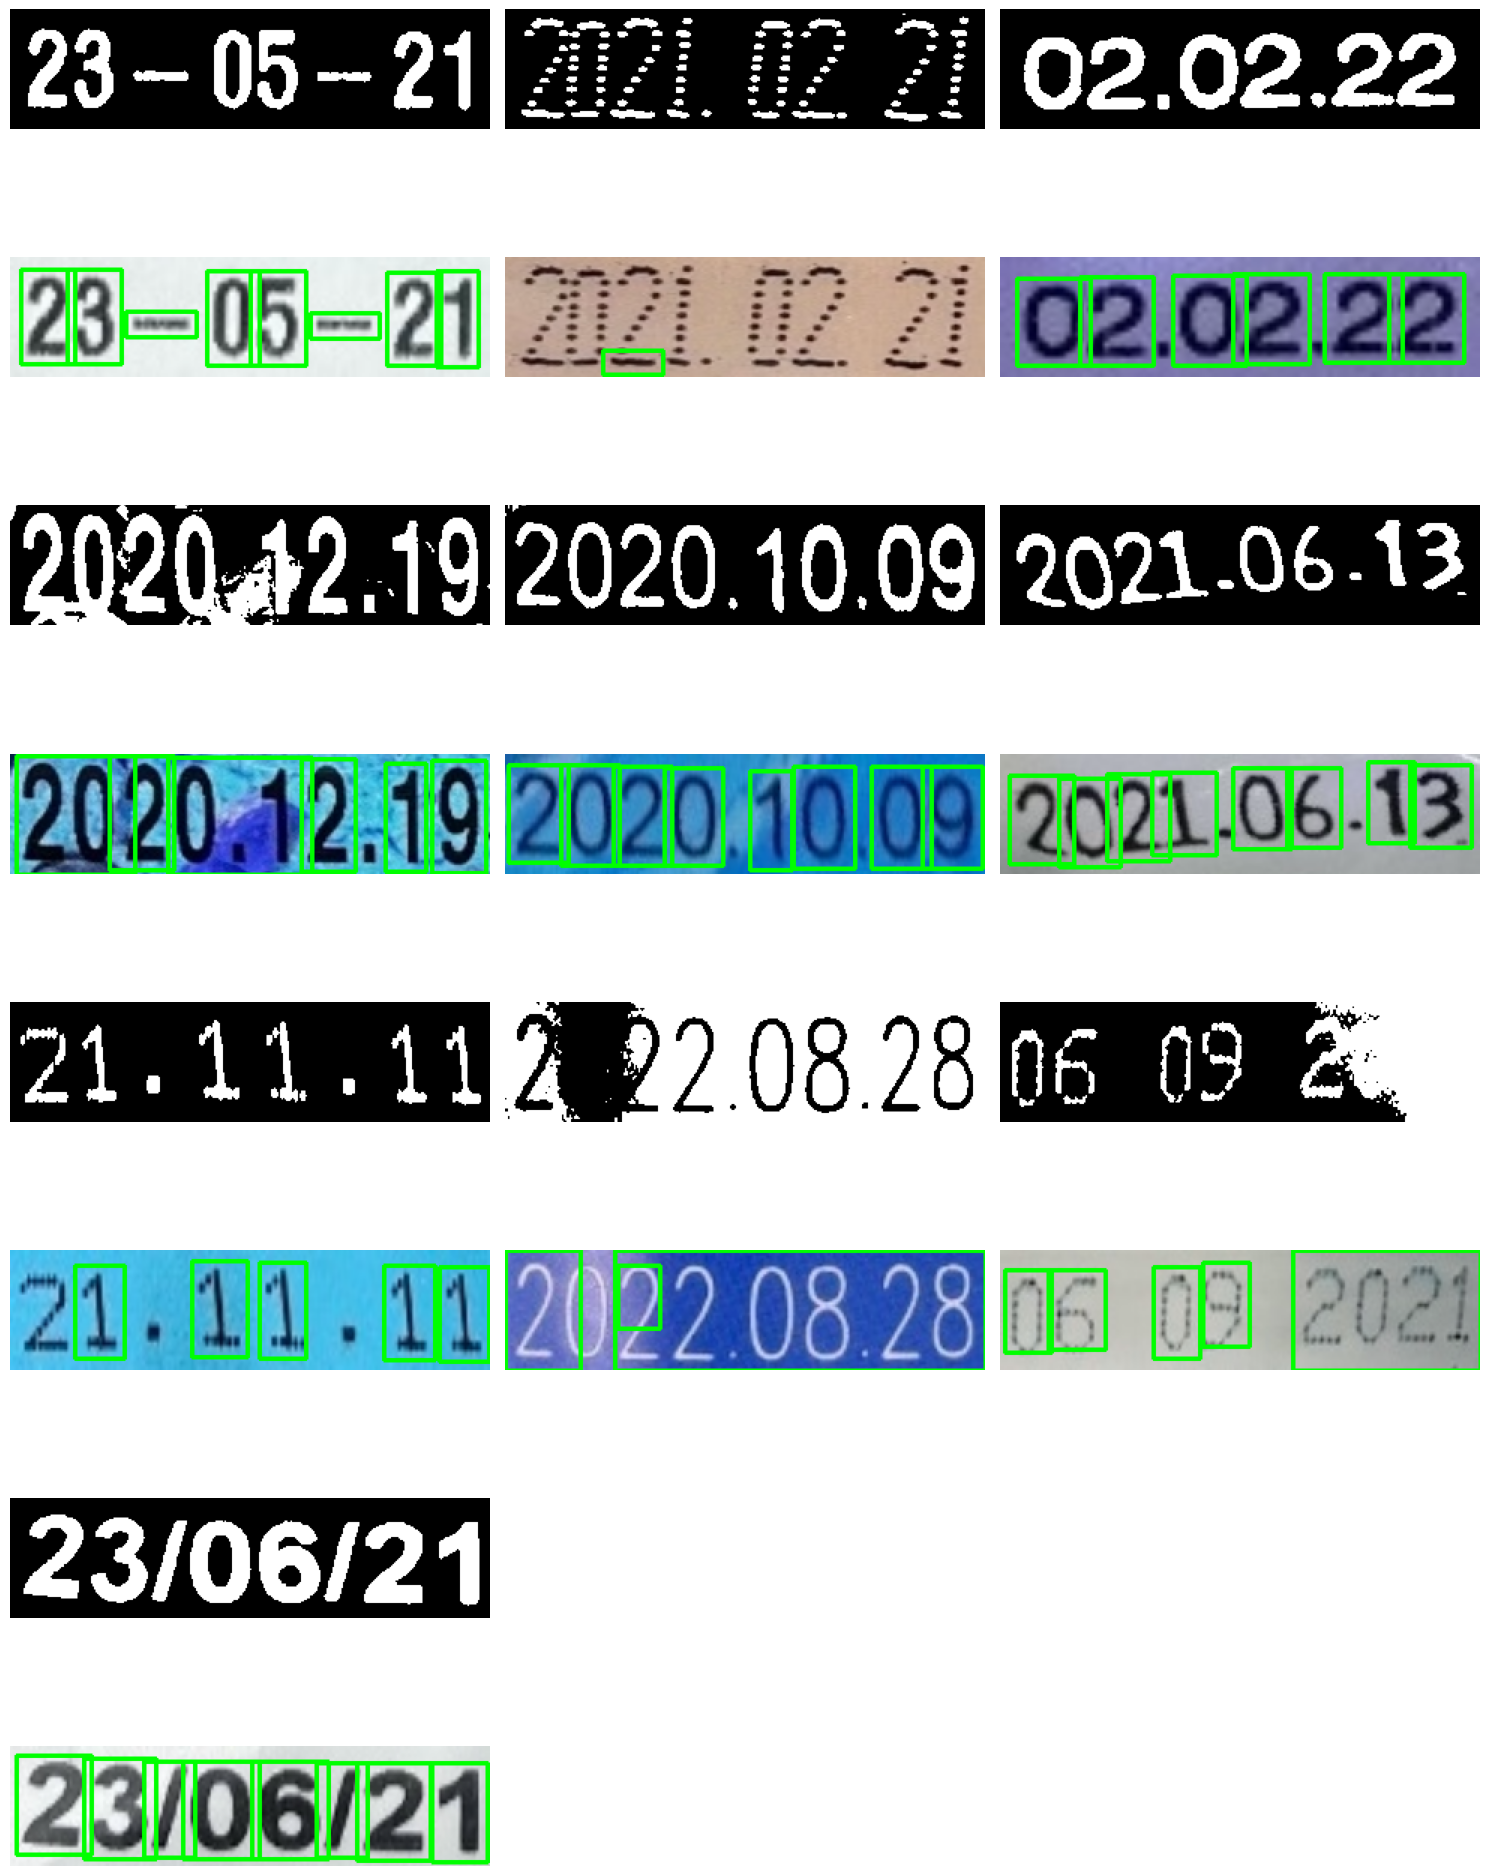

In [49]:

images = os.listdir(DATASET_PATH)

random.shuffle(images)

image_data = []
for image_name in images[:10]:
    image_path = os.path.join(DATASET_PATH, image_name)
    
    original_image = cv2.imread(image_path)
    
    image, original_image = preprocess_image(original_image)
    
    labeled_image = segment_image(image, original_image, image_name, type='label')
    
    
    image_data.append((image, labeled_image))

show_images(image_data)

In [27]:
images = os.listdir(DATASET_PATH)

image_count = len(images)


for data_count, image_name in enumerate(images):
    image_path = os.path.join(DATASET_PATH, image_name)
    
    original_image = cv2.imread(image_path)
    
    image, original_image = preprocess_image(original_image)
    
    segment_image(image, original_image, image_name, type='write')
            
    print(f'{data_count}/{image_count}')

0/510
1/510
2/510
3/510
4/510
5/510
6/510
7/510
8/510
9/510
10/510
11/510
12/510
13/510
14/510
15/510
16/510
17/510
18/510
19/510
20/510
21/510
22/510
23/510
24/510
25/510
26/510
27/510
28/510
29/510
30/510
31/510
32/510
33/510
34/510
35/510
36/510
37/510
38/510
39/510
40/510
41/510
42/510
43/510
44/510
45/510
46/510
47/510
48/510
49/510
50/510
51/510
52/510
53/510
54/510
55/510
56/510
57/510
58/510
59/510
60/510
61/510
62/510
63/510
64/510
65/510
66/510
67/510
68/510
69/510
70/510
71/510
72/510
73/510
74/510
75/510
76/510
77/510
78/510
79/510
80/510
81/510
82/510
83/510
84/510
85/510
86/510
87/510
88/510
89/510
90/510
91/510
92/510
93/510
94/510
95/510
96/510
97/510
98/510
99/510
100/510
101/510
102/510
103/510
104/510
105/510
106/510
107/510
108/510
109/510
110/510
111/510
112/510
113/510
114/510
115/510
116/510
117/510
118/510
119/510
120/510
121/510
122/510
123/510
124/510
125/510
126/510
127/510
128/510
129/510
130/510
131/510
132/510
133/510
134/510
135/510
136/510
137/510
138/51